**Importing required libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**uploading data set**

In [ ]:
data = pd.read_csv ('Mall_Customers.csv', index_col='CustomerID')

**checking what is loaded inside our data set**

In [ ]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


**Detecting and Handling Outlier**

Now let us see if our given dataset contains any outliers using a boxplot

In [ ]:
#data.get('Annual Income')
#data

Text(0.5, 1.0, 'Boxplot of Annual Income (k$)')

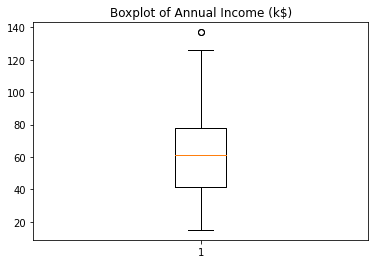

In [ ]:
plt.boxplot(data["Annual Income (k$)"])
plt.title("Boxplot of Annual Income (k$)")

In [ ]:
data.shape

(200, 4)

In [ ]:
Q1=np.percentile(data["Annual Income (k$)"],25,interpolation='midpoint')
Q2=np.percentile(data["Annual Income (k$)"],50,interpolation='midpoint')
Q3=np.percentile(data["Annual Income (k$)"],75,interpolation='midpoint')
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
outlier=[]
for x in data["Annual Income (k$)"]:
    if((x>upper_limit)or(x<lower_limit)):
        outlier.append(x)

In [ ]:
outlier_index = data["Annual Income (k$)"]>upper_limit
data.loc[outlier_index].index

Int64Index([199, 200], dtype='int64', name='CustomerID')

In [ ]:
data.drop([199, 200],inplace=True)

**Exploratory Data Analysis**

**1. Univariate Analysis**

**For instance, we find the number of observations in each category of the feature ‘Gender’ using countplot()**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


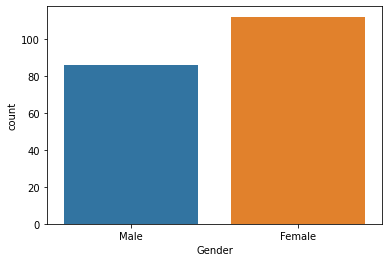

In [ ]:
sns.countplot(data['Gender'])

**Now, let us look at the univariate distribution of the feature ‘Age’ using distplot(). This allows us to look at the parametric distribution of our data**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


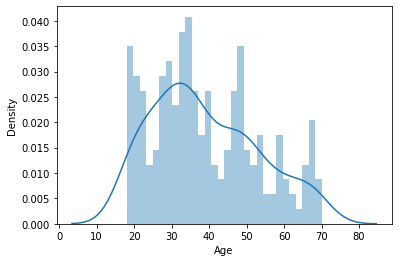

In [ ]:
sns.distplot(data['Age'], bins=30)

**2. Bivariate Analysis**

**Treating the categorical feature: We can assign or map the values of ‘Male’ and ‘Female’ entries in the given dataset as shown below.**

In [ ]:
gender= {'Male':0, 'Female':1}
data['Gender']= data['Gender'].map(gender)

**Scatter plot between 'Age' and 'Spending Score'**

Text(0.5, 1.0, 'Scatter plot between Age and Spending Score (1-100)')

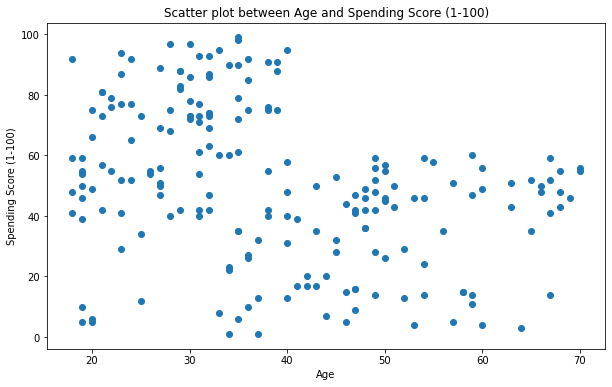

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(data['Age'],data['Spending Score (1-100)'], marker='o');
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter plot between Age and Spending Score (1-100)')

**Scatter plot between ‘Age’ and ‘Annual Income’**

Text(0.5, 1.0, 'Scatter plot between Age and Annual Income (k$)')

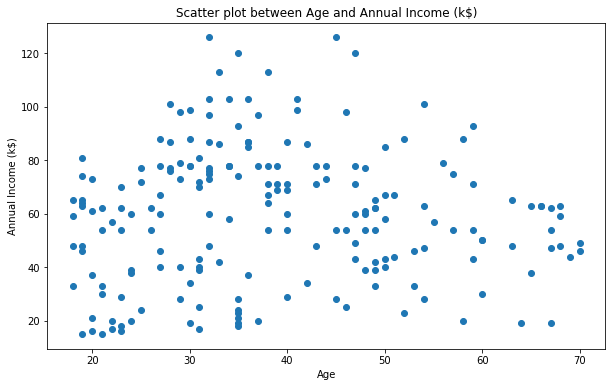

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(data['Age'],data['Annual Income (k$)'], marker='o');
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Scatter plot between Age and Annual Income (k$)')

**Scatter plot between ‘Annual Income’ and ‘Spending Score’**

Text(0.5, 1.0, 'Scatter plot between Annual Income (k$) and Spending Score (1-100)')

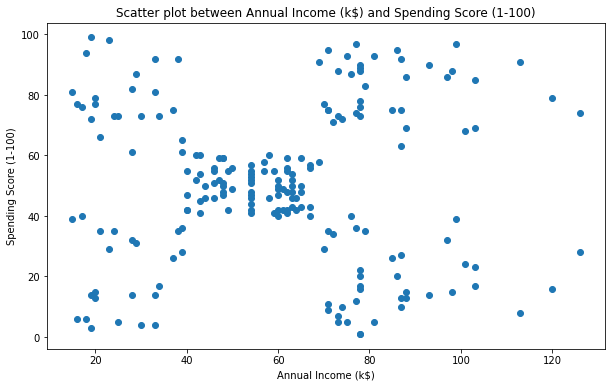

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'], marker='o');
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter plot between Annual Income (k$) and Spending Score (1-100)')

**Scatter plot between ‘Gender’ and ‘Spending Score’**

Text(0.5, 1.0, 'Scatter plot between Gender and Spending Score (1-100)')

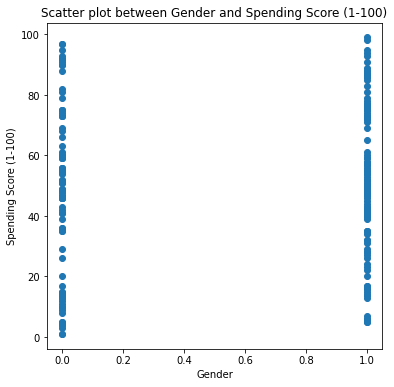

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(data['Gender'],data['Spending Score (1-100)'], marker='o');
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter plot between Gender and Spending Score (1-100)')

**Scatter plot between ‘Gender’ and ‘Annual Income’**

Text(0.5, 1.0, 'Scatter plot between Gender and Annual Income (k$)')

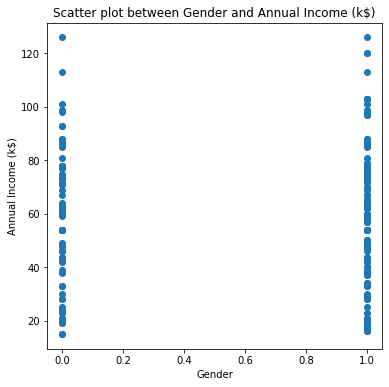

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(data['Gender'],data['Annual Income (k$)'], marker='o');
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.title('Scatter plot between Gender and Annual Income (k$)')

**Scatter plot between ‘Gender’ and ‘Age’**

Text(0.5, 1.0, 'Scatter plot between Gender and Age')

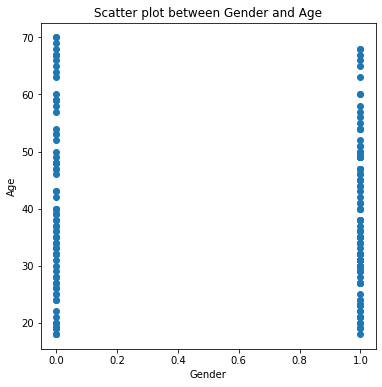

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(data['Gender'],data['Age'], marker='o');
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Scatter plot between Gender and Age')

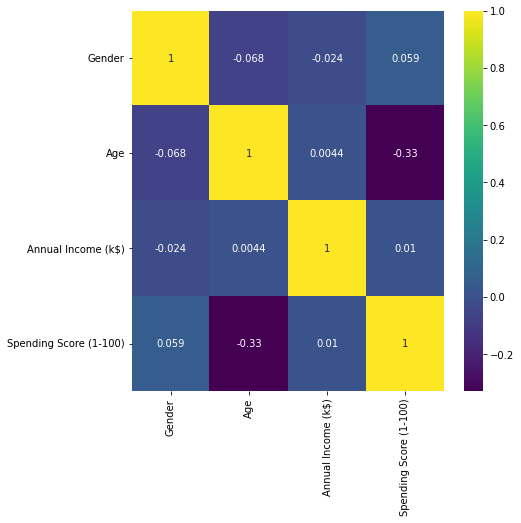

In [ ]:
fig_dims = (7, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

Text(0, 0.5, 'Spending Score')

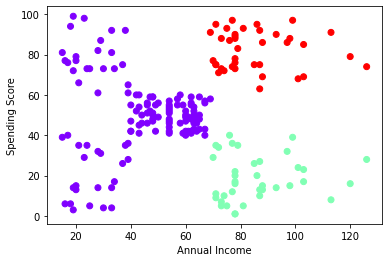

In [ ]:
#create a copy of the data variable
x = data.copy()
# The number in the brackets is K, or the number of clusters we are aiming for, here we take 3 randomly
kmeans = KMeans(3)
# Fit the data
kmeans.fit(x)
# Create a copy of the input data
clusters = x.copy()
# Take note of the predicted clusters 
clusters['cluster_pred']=kmeans.fit_predict(x)
# Plot the data using the Annual Income and the Spending Score
plt.scatter(clusters['Annual Income (k$)'],clusters['Spending Score (1-100)'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

Text(0, 0.5, 'Spending Score')

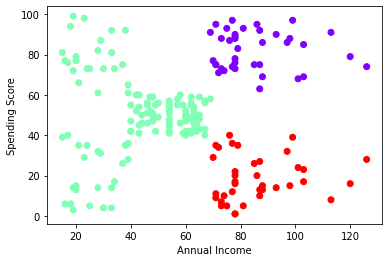

In [ ]:
#create a copy of the data variable
x = data.copy()
# The number in the brackets is K, or the number of clusters we are aiming for, here we take 3 randomly
kmeans = KMeans(3)
# Fit the data
kmeans.fit(x)
# Create a copy of the input data
clusters = x.copy()
# Take note of the predicted clusters 
clusters['cluster_pred']=kmeans.fit_predict(x)
# Plot the data using the Annual Income and the Spending Score
plt.scatter(clusters['Annual Income (k$)'],clusters['Spending Score (1-100)'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [ ]:
print(silhouette_score(clusters, kmeans.labels_, metric='euclidean'))

0.3795052407385825


In [ ]:
kmeans_new = KMeans(5)
#Fit the data
kmeans_new.fit(x)
#Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x)
#mapping the gender variable back to 'male' and 'female'
gender= {0:'Male',1:'Female'}
clusters_new['Gender']= clusters_new['Gender'].map(gender)

Text(0, 0.5, 'Spending Score')

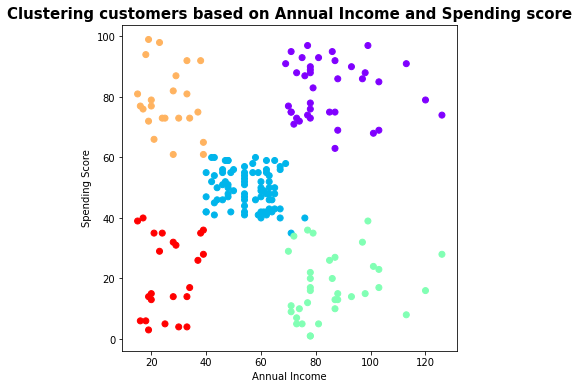

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(clusters_new['Annual Income (k$)'],clusters_new['Spending Score (1-100)'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.title("Clustering customers based on Annual Income and Spending score", fontsize=15,fontweight="bold")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

In [ ]:
avg_data = clusters_new.groupby(['cluster_pred'], as_index=False).mean()
avg_data

,cluster_pred,Age,Annual Income (k$),Spending Score (1-100)
0,0,32.763158,85.210526,82.105263
1,1,43.088608,55.291139,49.569620
2,2,40.914286,86.342857,17.571429
3,3,25.521739,26.304348,78.565217
4,4,45.217391,26.304348,20.913043


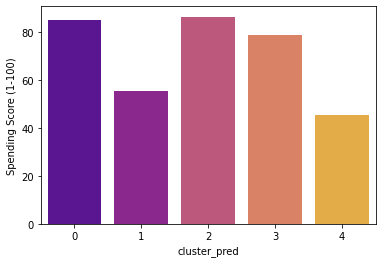

In [ ]:
sns.barplot(x='cluster_pred',y='Age',palette="plasma",data=avg_data)
sns.barplot(x='cluster_pred',y='Annual Income (k$)',palette="plasma",data=avg_data)
sns.barplot(x='cluster_pred',y='Spending Score (1-100)',palette="plasma",data=avg_data)

In [ ]:
data2 = pd.DataFrame(clusters_new.groupby(['cluster_pred','Gender'])['Gender'].count())
data2

Gender
cluster_pred Gender        
0            Female      21
             Male        17
1            Female      46
             Male        33
2            Female      17
             Male        18
3            Female      14
             Male         9
4            Female      14
             Male         9

Red: low annual income, low spending score

Orange: low annual income, high spending score


Violet: intermediate annual income, intermediate spending score


Blue: high annual income, high spending score


Green: high annual income, low spending score